<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


In [1]:

# Import thư viện cần thiết

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn cho preprocessing, model, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Chỉ để plot đẹp hơn
sns.set(style="whitegrid")


In [2]:

# Load dataset
# Dataset: House Prices
# Sẽ dự đoán 'SalePrice' dựa trên các features khác
# ------------------------------
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

# Xem thông tin cơ bản của dataset
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:

# Data Summary
# ------------------------------

print("Dataset shape:", data.shape)  # số dòng và cột
print("Columns:", data.columns.tolist())  # các biến
# Giả sử chúng ta dự đoán 'median_house_value' (giá nhà trung bình)
target = "median_house_value"


Dataset shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [4]:

# Handle missing values

# Với dataset này, sẽ điền giá trị thiếu bằng median cho numeric
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Với categorical columns: điền bằng mode
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39316\1275085687.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39316\1275085687.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [ ]:
# ------------------------------
#  Feature selection
# Chọn một số biến số để đơn giản hóa model
# ------------------------------
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income']

X = data[features]
y = data[target]


In [ ]:
# ------------------------------
# Split train/test
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# ------------------------------
# Scale features
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ------------------------------
# Train Linear Regression model
# ------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)

# Evaluate
print("Linear Regression R2 (Train):", r2_score(y_train, y_pred_train))
print("Linear Regression R2 (Test):", r2_score(y_test, y_pred_test))


Linear Regression R2 (Train): 0.5700818543102877
Linear Regression R2 (Test): 0.5445046216087992


In [ ]:
# ------------------------------
#Train Ridge Regression (Regularization)
# ------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge Regression R2 (Test):", r2_score(y_test, y_pred_ridge))


Ridge Regression R2 (Test): 0.5445217150472839


In [ ]:
# ------------------------------
# Train Lasso Regression (Regularization + feature selection)
# ------------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso Regression R2 (Test):", r2_score(y_test, y_pred_lasso))


Lasso Regression R2 (Test): 0.5445052531625791


In [ ]:
# ------------------------------
#  Optional: Polynomial Features
# ------------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = lin_reg_poly.predict(X_test_poly)
print("Polynomial Linear Regression R2 (Test):", r2_score(y_test, y_pred_poly))


Polynomial Linear Regression R2 (Test): 0.4714880663445081


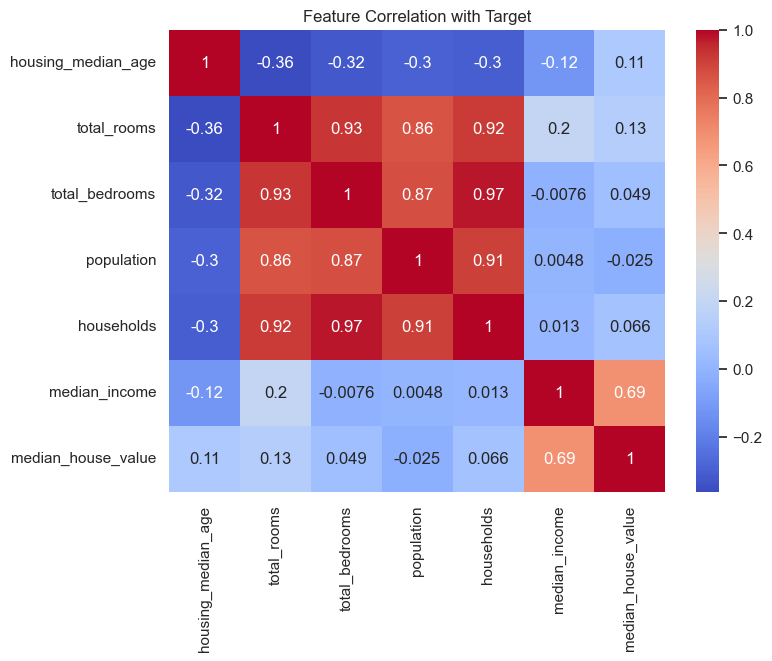

In [ ]:
# ------------------------------
#  Key Findings
# ------------------------------
# Vẽ correlation matrix giữa features và target
plt.figure(figsize=(8,6))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()


In [ ]:

# ------------------------------
# 1. Linear models đơn giản, không capture hết non-linear patterns
# 2. Cần nhiều feature hơn, hoặc dữ liệu chi tiết hơn
# 3. Có thể thử Random Forest, XGBoost cho dự đoán chính xác hơn
# 4. Feature engineering: tạo biến mới từ existing features (rooms per household,…)


Copyright @ IBM Corporation. All rights reserved.
